In [1]:
# basic operations
import numpy as np
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# file path
import os

In [2]:
train_df = pd.read_hdf('train_data3.h5')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2970071 entries, 0 to 2970070
Data columns (total 13 columns):
广告id         int64
日期           int64
曝光广告素材尺寸     int64
曝光广告出价bid    float64
日曝光量         int64
创建时间         datetime64[ns, Asia/Shanghai]
广告账户id       int64
商品id         int64
商品类型         int64
广告行业id       int64
创建星期         int64
投放时段         int64
面向人群         object
dtypes: datetime64[ns, Asia/Shanghai](1), float64(1), int64(10), object(1)
memory usage: 317.2+ MB


# 柱状图统计连续型数量分布

**reference : https://www.kaggle.com/roshansharma/fifa-2019-data-analysis-and-visualization**

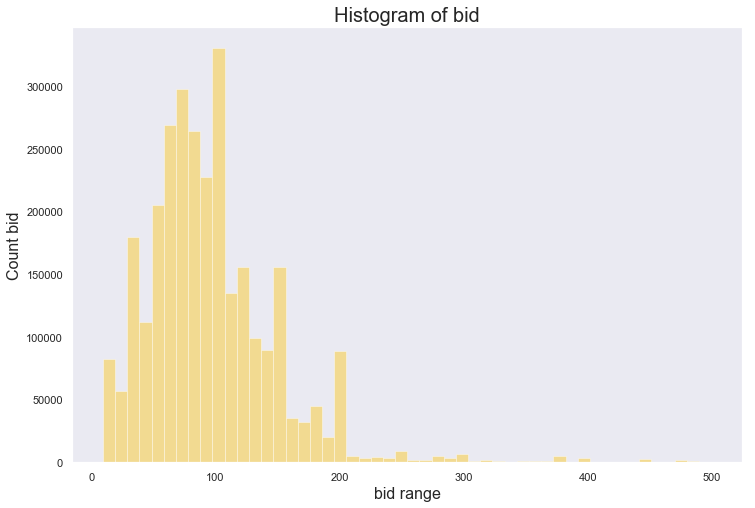

In [26]:
# distplot
#### 曝光广告出价bid -- 长尾数据 集中在【0，200】的区间

x = train_df[train_df.曝光广告出价bid < 500]
plt.figure(figsize=(12,8))
ax = sns.distplot(x['曝光广告出价bid'], bins = 50, kde = False, color = 'y')
ax.set_xlabel(xlabel = "bid range", fontsize = 16)
ax.set_ylabel(ylabel = 'Count bid', fontsize = 16)
ax.set_title(label = 'Histogram of bid', fontsize = 20)
plt.show()

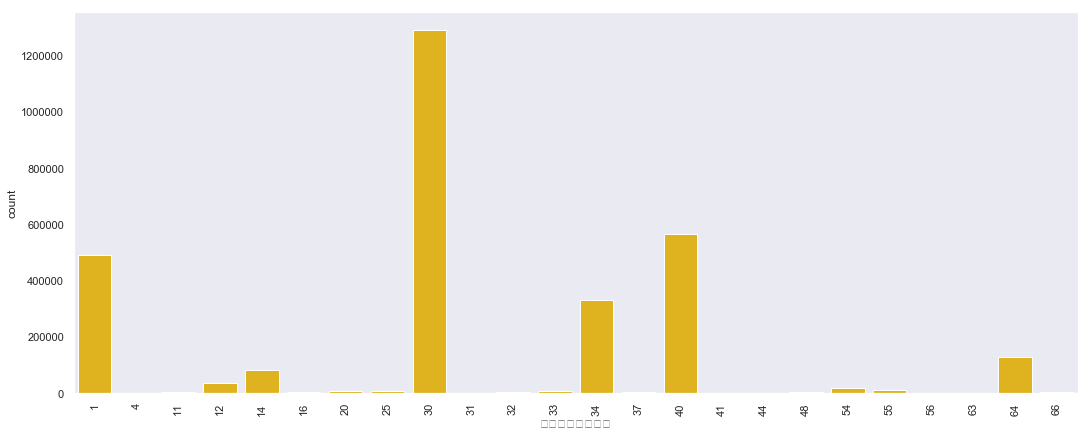

In [6]:
# 柱状图
### 曝光广告素材尺寸: 近似于正态分布
sns.set(style = 'dark', palette = 'bright', color_codes = True)
x = train_df.曝光广告素材尺寸
plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(x, data = train_df, color = 'y')
# plt.xlabel('Wage Range for Players', fontsize = 16)
# plt.ylabel('Count of the Players', fontsize = 16)
# plt.title('Comparing the wages of players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

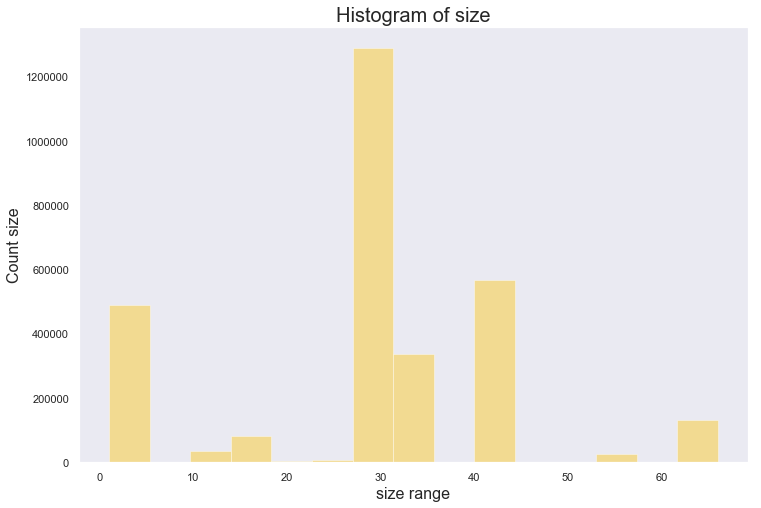

In [30]:
# distplot
#### 曝光广告素材尺寸 -- 偏正态分布 ， 集中于【30，40】

x = train_df['曝光广告素材尺寸']
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 15, kde = False, color = 'y')
ax.set_xlabel(xlabel = "size range", fontsize = 16)
ax.set_ylabel(ylabel = 'Count size', fontsize = 16)
ax.set_title(label = 'Histogram of size', fontsize = 20)
plt.show()

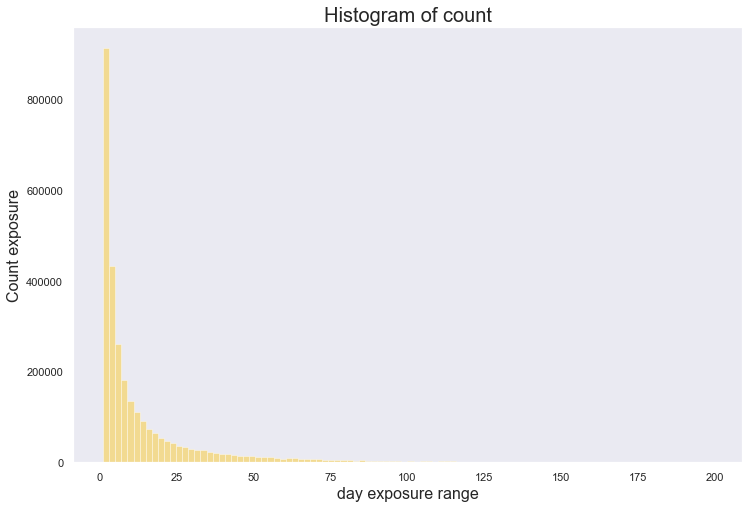

In [35]:
# distplot
#### 日曝光量 -- 长尾数据 

x = train_df[train_df.日曝光量 < 200]
plt.figure(figsize=(12,8))
ax = sns.distplot(x['日曝光量'], bins = 100, kde = False, color = 'y')
ax.set_xlabel(xlabel = "day exposure range", fontsize = 16)
ax.set_ylabel(ylabel = 'Count exposure', fontsize = 16)
ax.set_title(label = 'Histogram of count', fontsize = 20)
plt.show()

In [ ]:
# 箱状图

# 柱状图统计离散型数量分布

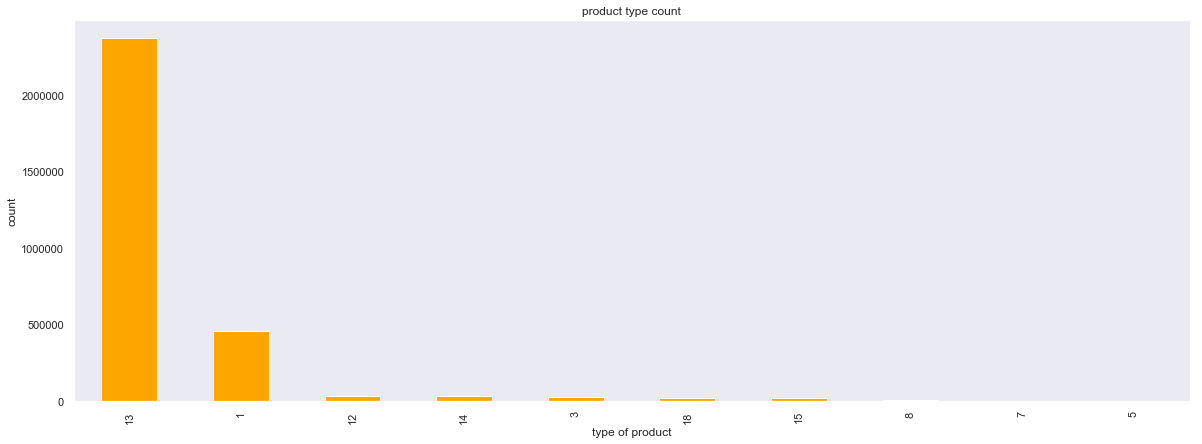

In [36]:
# bar plot 
# 商品类型  10个类别
train_df['商品类型'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('product type count')
plt.xlabel('type of product')
plt.ylabel('count')
plt.show()

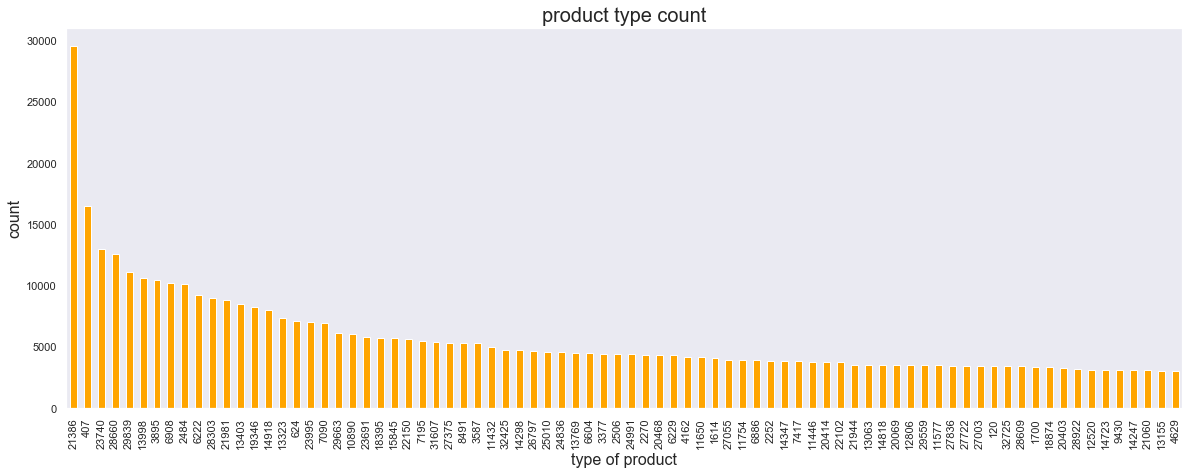

In [40]:
# bar plot 
# 商品id 前80
train_df[train_df.商品id > -1]['商品id'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('product type count', size=20)
plt.xlabel('type of product', size=16)
plt.ylabel('count', size=16)
plt.show()

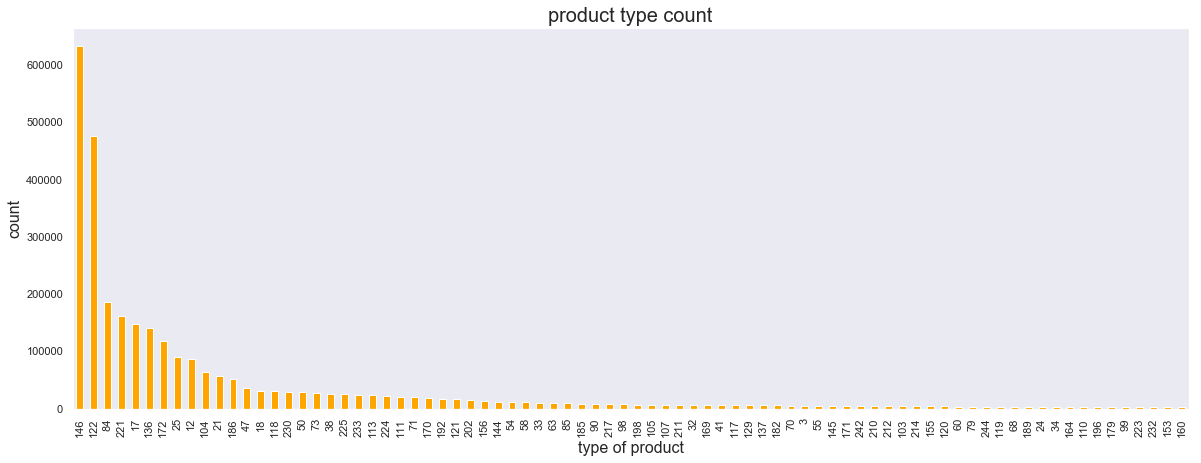

In [43]:
# bar plot 
# 广告行业id  前80
train_df['广告行业id'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('ad type count', size=20)
plt.xlabel('type of ad', size=16)
plt.ylabel('count', size=16)
plt.show()

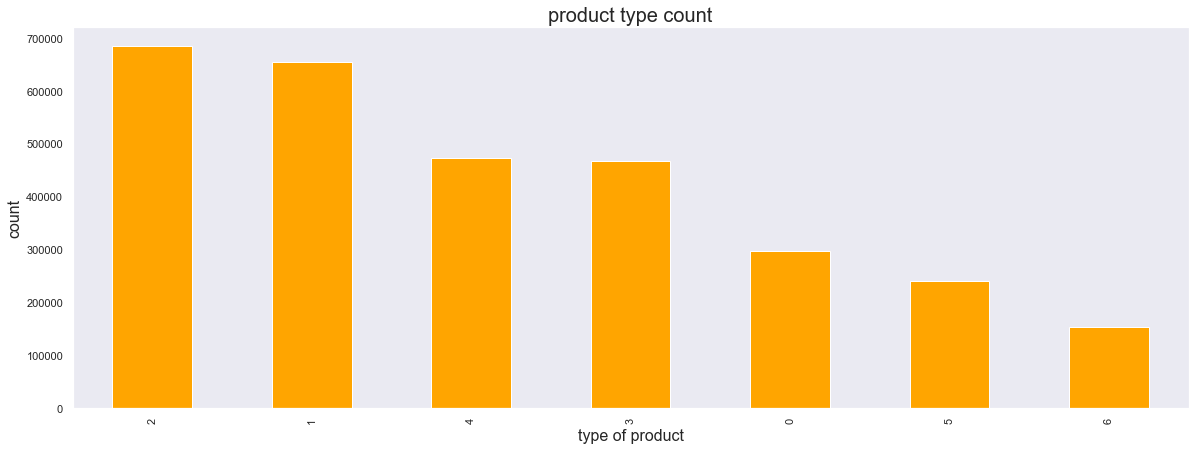

In [44]:
# bar plot 
# 创建星期  几乎平均
train_df['创建星期'].value_counts().plot.bar(color = 'orange', figsize = (20, 7))
plt.title('product type count', size=20)
plt.xlabel('type of product', size=16)
plt.ylabel('count', size=16)
plt.show()

In [45]:
train_sparse_df = pd.read_hdf('train_sparse_data2.h5')

In [58]:
list1 = []
for i in range(48):
    list1 += ["时段" + str(i)]
# train_sparse_df
period = train_sparse_df[list1]

In [84]:
def isZero(x):
    if x == 0:
        return True
    else:
        return False
    
# period['时段0'] = period['时段0'].apply(lambda x: isZero(x))

for i in list1:
    period.loc[i] = period[i].apply(lambda x:isZero(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


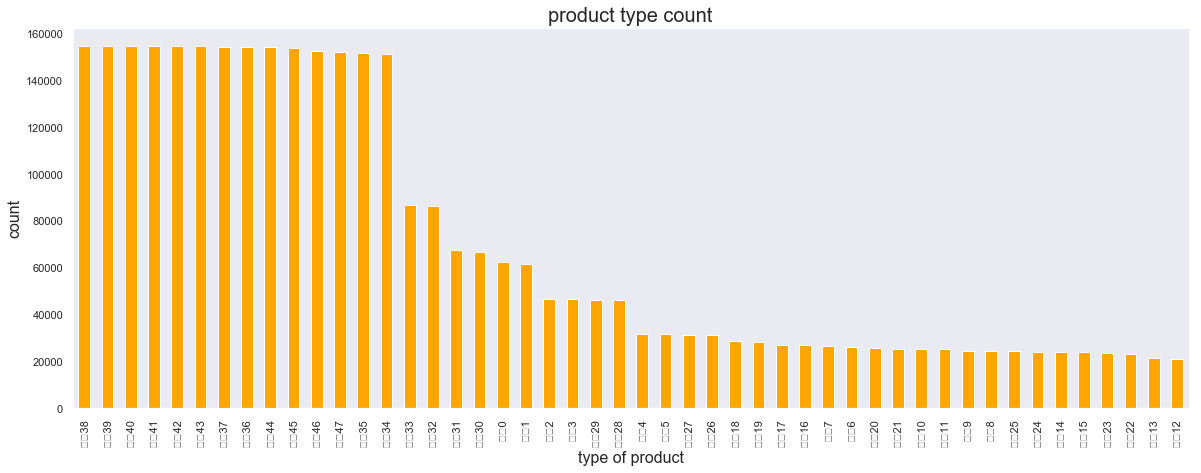

In [83]:
# bar plot 
# 投放时段  主要集中区间【34，47】即 17:00 - 23:30
period.sum().sort_values(ascending = False).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('product type count', size=20)
plt.xlabel('type of product', size=16)
plt.ylabel('count', size=16)
plt.show()

# 散点图观察分布

In [ ]:
# sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')

# 饼图观察概率分布

In [ ]:
# labels = ['5', '4', '3', '2', '1'] 
# size = [229, 2662, 11349, 3761, 158]
# colors = ['red', 'yellow', 'green', 'pink', 'blue']
# explode = [0.1, 0.1, 0.1, 0.1, 0.1]

# plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
# plt.title('Pie Chart for Representing Week Foot of the Players', fontsize = 25)
# plt.legend()
# plt.show()